In [25]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
from pandas_datareader import data as pdr
import yfinance as yf
import statistics as sts

In [26]:
yf.pdr_override()

In [27]:
#We will analyze the performance of the stock index of some G7 countries in the pandemic scenario
#EUA-S&P 500 ; Canada-TSX-300; Germany-DAX-30
#France-CAC-40.
#The order is respective as shown above.
indicators=['^GSPC','^GSPTSE','^GDAXI','^FCHI']
indexes=pd.DataFrame()


In [28]:
indexes=pdr.get_data_yahoo(indicators,start='2020-01-01',end='2023-01-01')['Adj Close']

[*********************100%***********************]  4 of 4 completed


In [29]:
#renaming column names
#names=['S&P 500','TSX-300','DAX-30','CAC-40']
indexes.rename(columns={'^GSPC':'S&P 500','^GSPTSE':'TSX-300',
'^GDAXI':'DAX-30','^FCHI':'CAC-40'},inplace=True)
indexes.tail()

,CAC-40,DAX-30,S&P 500,TSX-300
Date,,,,
2022-12-23,6504.899902,13940.929688,3844.820068,19506.699219
2022-12-27,6550.660156,13995.099609,3829.250000,NaN
2022-12-28,6510.490234,13925.599609,3783.219971,19284.099609
2022-12-29,6573.470215,14071.719727,3849.280029,19485.900391
2022-12-30,6473.759766,13923.589844,3839.500000,19384.900391


In [30]:
#Nan values
indexes.isnull().sum()

CAC-40      4
DAX-30     10
S&P 500    20
TSX-300    23
dtype: int64

In [31]:
#Nan values on the TSX-300
mediana300=sts.median(indexes['TSX-300'])
indexes['TSX-300'].fillna(mediana300,inplace=True)

In [32]:
#Nan values on DAX-30
mediana30=sts.median(indexes['DAX-30'])
indexes['DAX-30'].fillna(mediana30,inplace=True)

In [33]:
#Nan values on the CAC-40
mediana40=sts.median(indexes['CAC-40'])
indexes['CAC-40'].fillna(mediana40,inplace=True)

In [34]:
#verification
indexes.isnull().sum()

CAC-40      0
DAX-30      0
S&P 500    20
TSX-300     0
dtype: int64

In [35]:
#setting up the indexes
sp500=indexes['S&P 500']
tsx300=indexes['TSX-300']
dax30=indexes['DAX-30']
cac40=indexes['CAC-40']

In [36]:
#cumulative return
sp500=np.cumprod(sp500.pct_change()+1)-1
tsx300=np.cumprod(tsx300.pct_change()+1)-1
dax30=np.cumprod(dax30.pct_change()+1)-1
cac40=np.cumprod(cac40.pct_change()+1)-1
sp500[-1]

0.17853795752057633

In [37]:
#the profit is determined by: sp500[-1]*100,tsx300[-1]*100 and so on
columns=['S&P 500','TSX-300','DAX-30','CAC-40']
profit=[round(sp500[-1]*100,2),round(tsx300[-1]*100,2),round(dax30[-1]*100,2),round(cac40[-1]*100,2)]

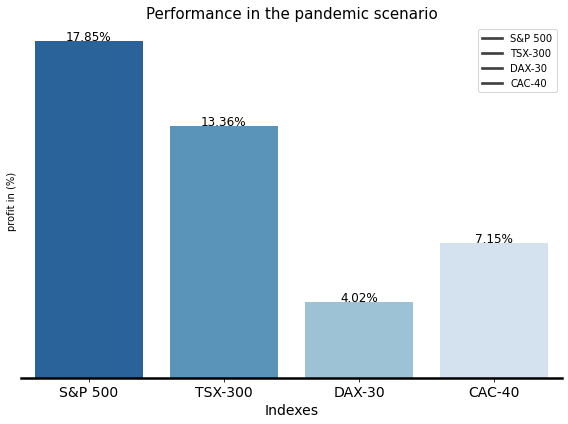

In [38]:
#figure, axes, setting the size
fig, ax = plt.subplots(figsize=(8,6))
#Bar plot
plot=sns.barplot(x=columns, y=profit, palette='Blues_r',ci=False)
#add title
ax.set_title("Performance in the pandemic scenario", fontdict={'fontsize':15})
#add legend 
plot.legend(labels=columns,loc='upper right')
#setting the name and size of xlabel
ax.set_xlabel('Indexes', fontdict={'fontsize':14})
#setting the name of ylabel
ax.set_ylabel('profit in (%)')
#setting the size of ticks
ax.tick_params(labelsize=14)
#increasing the thickness
ax.spines['bottom'].set_linewidth(2.5)
#removing axes
for axis in ['top', 'right', 'left']:
   ax.spines[axis].set_color(None)
#numbers
for i in plot.patches:
   plot.annotate(f'{i.get_height()}%',(i.get_x()+i.get_width()/2,i.get_height()),
   ha='center',va='baseline',fontsize=12,
   color='black',xytext=(0,1),
   textcoords='offset points')
#removinfg ticks
ax.tick_params(axis='y', labelleft=False, left=None)                  
#space optimize
fig.tight_layout();

In [39]:
#correlation
indexes.corr().style.background_gradient(cmap='Blues')

,CAC-40,DAX-30,S&P 500,TSX-300
CAC-40,1.000000,0.869519,0.916010,0.931204
DAX-30,0.869519,1.000000,0.898465,0.827745
S&P 500,0.916010,0.898465,1.000000,0.944639
TSX-300,0.931204,0.827745,0.944639,1.000000


In [42]:
sp500=indexes.iloc[:,0].values
tsx300=indexes.iloc[:,1].values

In [43]:
correlacao=np.corrcoef(sp500,tsx300)
correlacao

array([[1.        , 0.86951905],
       [0.86951905, 1.        ]])